# Heteroscedasticity

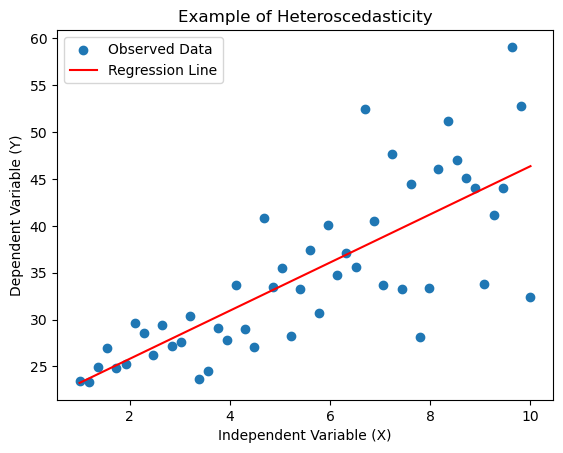

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate example data with heteroscedasticity
np.random.seed(42)
x = np.linspace(1, 10, 50)
y = 3 * x + 20 + np.random.normal(0, x, 50)

# Fit a linear regression model
coefficients = np.polyfit(x, y, 1)
poly = np.poly1d(coefficients)
y_pred = poly(x)

# Plot the data and regression line
plt.scatter(x, y, label='Observed Data')
plt.plot(x, y_pred, color='red', label='Regression Line')

plt.title('Example of Heteroscedasticity')
plt.xlabel('Independent Variable (X)')
plt.ylabel('Dependent Variable (Y)')
plt.legend()
plt.show()

# MLE for logistic regression

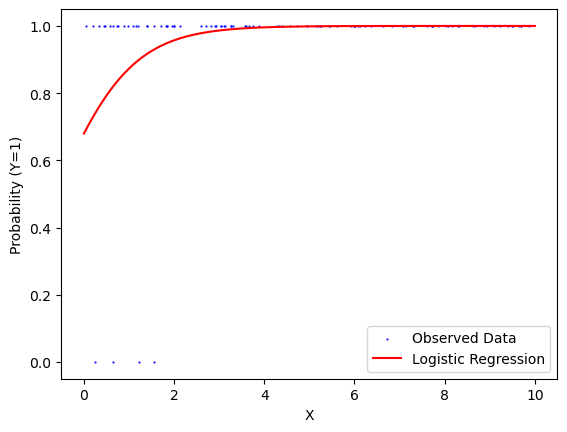

True Parameters: [1.5 0.5]
MLE Parameters: [0.753521   1.17656067]


In [6]:
from scipy.optimize import minimize

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Predictor variable
true_params = np.array([1.5, 0.5])  # True parameters
y_prob = 1 / (1 + np.exp(-(true_params[0] + true_params[1] * X)))
y = np.random.binomial(1, y_prob)  # Binary outcome

# Define the logistic function
def logistic_function(params, x):
    return 1 / (1 + np.exp(-(params[0] + params[1] * x)))

# Define the negative log-likelihood function for logistic regression
def negative_log_likelihood(params, x, y):
    y_pred = logistic_function(params, x)
    log_likelihood = y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)
    return -np.sum(log_likelihood)

# Initial guess for parameters
initial_params = np.zeros(2)

# Use scipy's minimize function to find MLE
result = minimize(negative_log_likelihood, initial_params, args=(X, y), method='BFGS')

# Extract MLE parameters
mle_params = result.x

# Plot the data and the logistic regression curve
plt.scatter(X, y, label='Observed Data', color='blue', s=0.3)
x_values = np.linspace(0, 10, 100)
y_values = logistic_function(mle_params, x_values)
plt.plot(x_values, y_values, label='Logistic Regression', color='red')
plt.xlabel('X')
plt.ylabel('Probability (Y=1)')
plt.legend()
plt.show()

print(f"True Parameters: {true_params}")
print(f"MLE Parameters: {mle_params}")

# t-SNE

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
 
from sklearn.manifold import TSNE
from sklearn import datasets
 
from mpl_toolkits.mplot3d import Axes3D

In [2]:
swissroll, color = datasets.make_swiss_roll(n_samples=5000, noise=0.1, random_state=42)

Rozmiar danych (shape): (5000, 3)


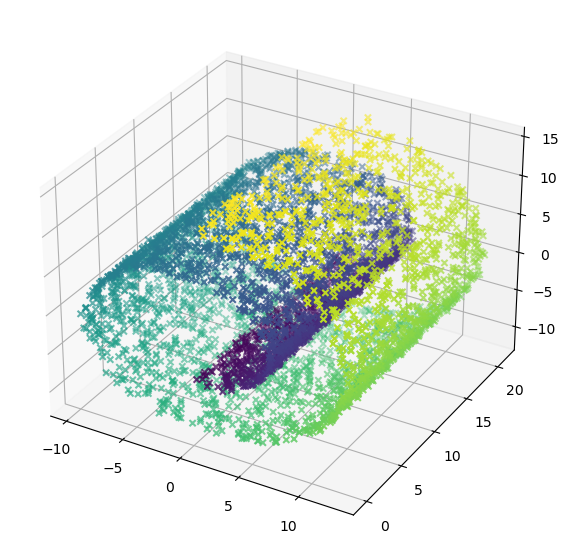

In [7]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
 
print(f'Rozmiar danych (shape): {swissroll.shape}')
ax.scatter(swissroll[:,0], swissroll[:,1], swissroll[:,2], marker='x', c=color);

Perplexity = 5


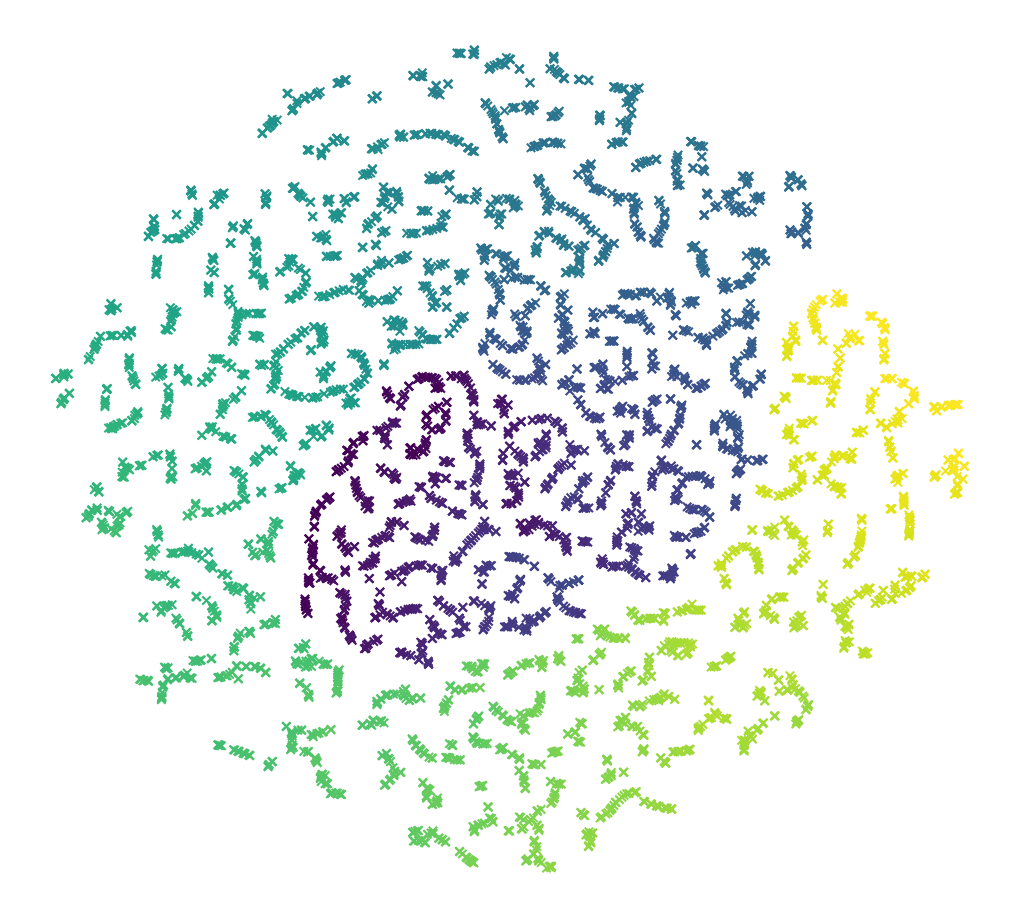

Perplexity = 10


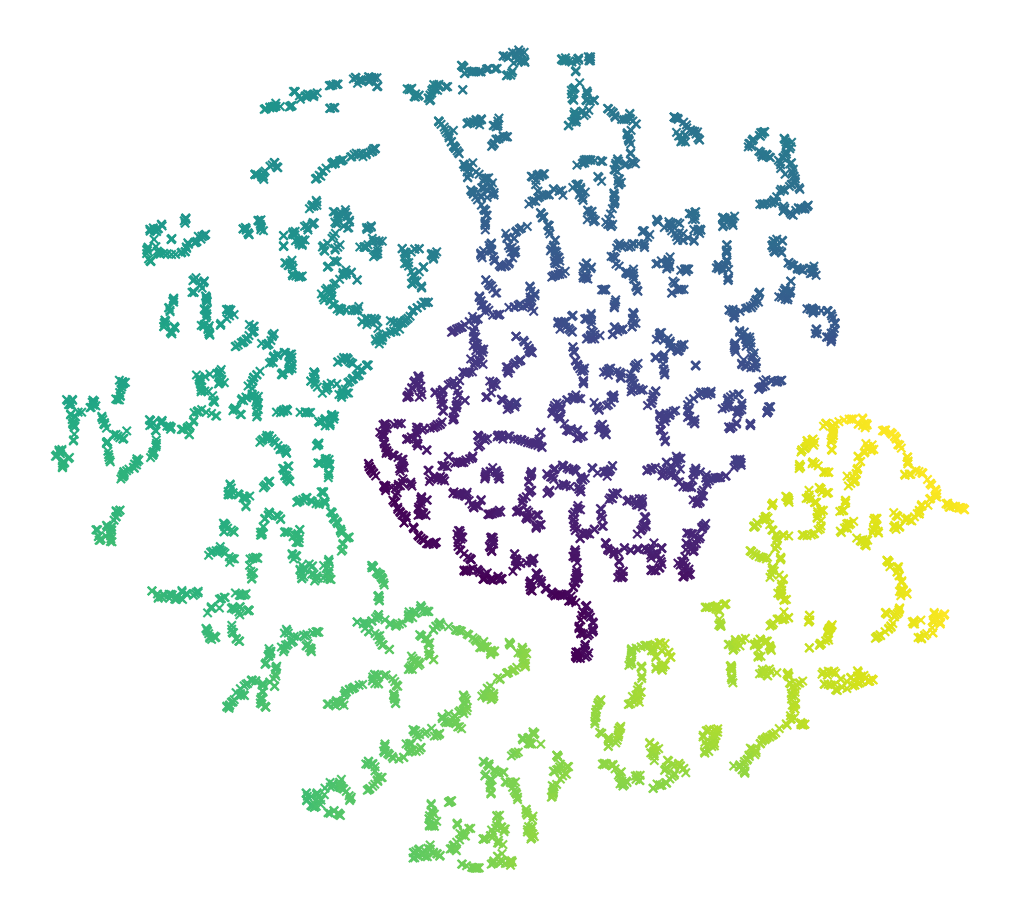

Perplexity = 30


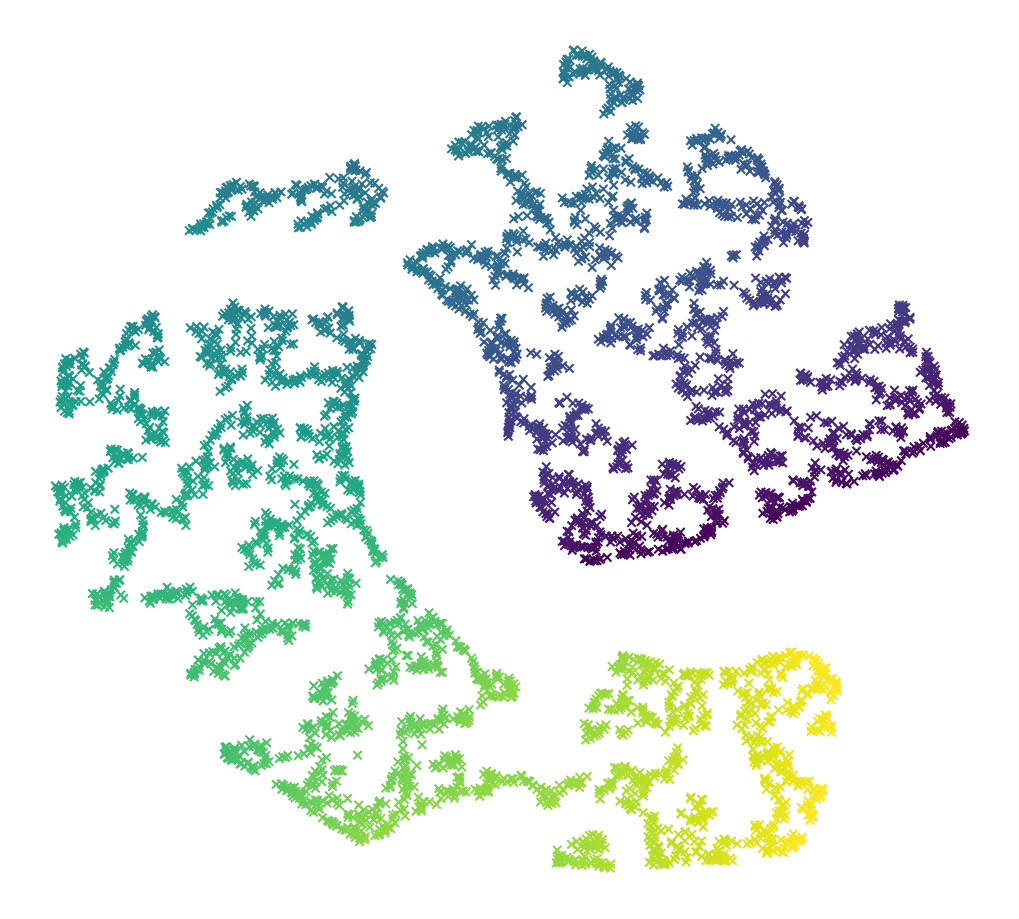

Perplexity = 50


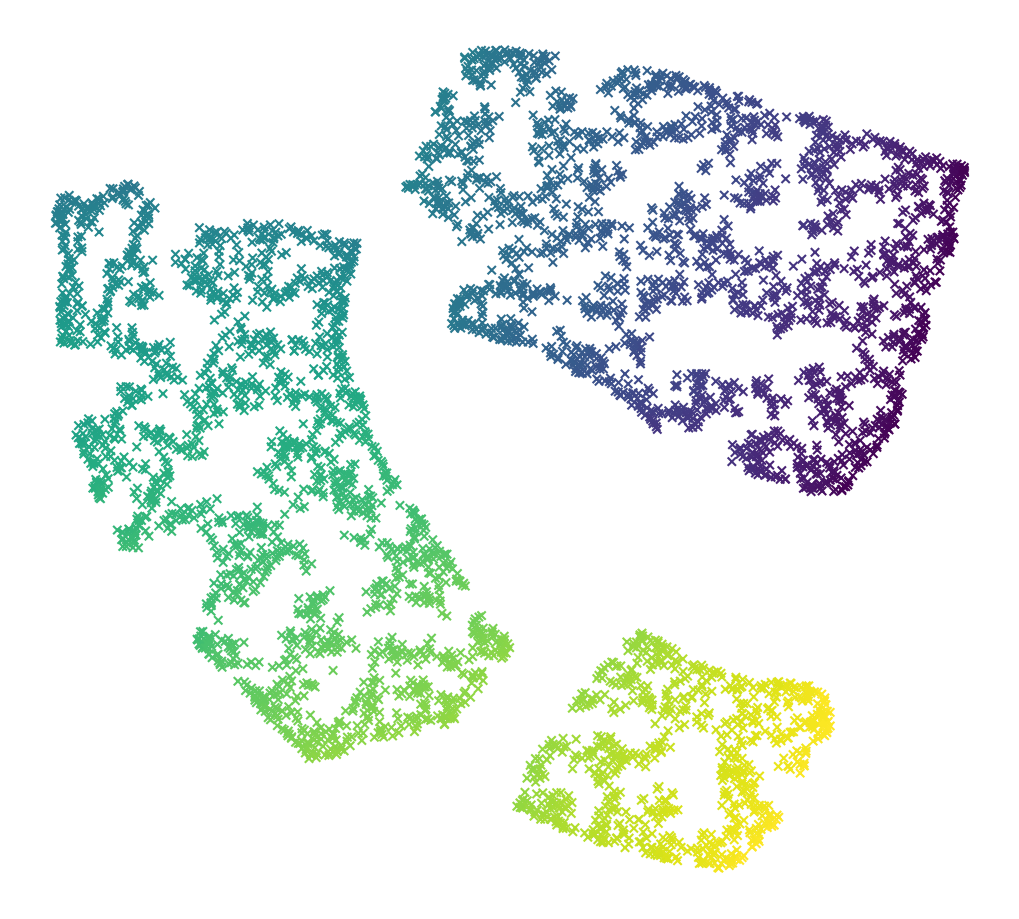

In [8]:
for perplexity in [5, 10, 30, 50]:
    print(f'Perplexity = {perplexity}')
    X_tsne = TSNE(learning_rate=100, perplexity=perplexity).fit_transform(swissroll)
    fig = plt.figure(figsize=(10, 10))
    ax = plt.axes(frameon=False)
    plt.setp(ax, xticks=(), yticks=())
    plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9, wspace=0.0, hspace=0.0)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=color, marker="x")
    plt.show();

# Pandas tidbits

In [11]:
import pandas as pd

data = [['John', 50, 'Austin', 70],
        ['Cataline', 45 , 'San Francisco', 80],
        ['Matt', 30, 'Boston' , 95]]

columns = ['Name', 'Age', 'City', 'Marks']

#row indexes
idx = ['x', 'y', 'z']

df = pd.DataFrame(data, columns=columns, index=idx)

print(df)

       Name  Age           City  Marks
x      John   50         Austin     70
y  Cataline   45  San Francisco     80
z      Matt   30         Boston     95


In [19]:
df.index = [1,2,3]
df.columns = ['a', 'b', 'c', 'd']
df

,a,b,c,d
1,John,50,Austin,70
2,Cataline,45,San Francisco,80
3,Matt,30,Boston,95


In [25]:
df.groupby(['a', 'b']).sum().index

MultiIndex([('Cataline', 45),
            (    'John', 50),
            (    'Matt', 30)],
           names=['a', 'b'])

In [26]:
import pandas as pd

data = [['John', 50, 'Male', 'Austin', 70],
        ['Cataline', 45 ,'Female', 'San Francisco', 80],
        ['Matt', 30 ,'Male','Boston', 95]]

# Column labels of the DataFrame
columns = ['Name','Age','Sex', 'City', 'Marks']

# Create a DataFrame df
df = pd.DataFrame(data, columns=columns)

df['Sex'].value_counts()

Sex
Male      2
Female    1
Name: count, dtype: int64

In [27]:
df.dtypes

Name     object
Age       int64
Sex      object
City     object
Marks     int64
dtype: object

In [35]:
df[(df.Name == "John") | (df.Marks > 90)]

,Name,Age,Sex,City,Marks
0,John,50,Male,Austin,70
2,Matt,30,Male,Boston,95


In [37]:
df.query("Name == 'John' or Marks > 90")

,Name,Age,Sex,City,Marks
0,John,50,Male,Austin,70
2,Matt,30,Male,Boston,95


In [43]:
data = {
    'Name': ['John', 'Matt', 'John', 'Cateline'],
    'math_Marks': [18, 20, 19, 15],
    'science_Marks': [10, 20, 15, 12]
}

# Create a DataFrame df
df = pd.DataFrame(data)

df['total'] = df.apply(lambda row : row["math_Marks"] + row["science_Marks"], axis=1)


In [45]:
import pandas as pd

data = {'Name': ['John', 'Cateline', 'Matt', 'Oliver'],
        'ID': [1, 22, 23, 36]}

df = pd.DataFrame(data)

#one hot encoding 
new_df = pd.get_dummies(df.Name)
new_df.head()

,Cateline,John,Matt,Oliver
0,False,True,False,False
1,True,False,False,False
2,False,False,True,False
3,False,False,False,True
